In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train=pd.read_csv("/content/Titanic_train.csv")
df_test=pd.read_csv("/content/Titanic_test.csv")

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_train['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


In [ ]:
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
df_train['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df_train['Embarked'].mode()[0]

'S'

In [ ]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)

In [ ]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_train['Age'].mean()

np.float64(29.69911764705882)

In [ ]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

In [ ]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_train['Cabin'].mode()[0]

'B96 B98'

In [ ]:
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0],inplace=True)

In [ ]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_train = df_train.drop(df_train.columns[[0,3]], axis=1)

In [ ]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,B96 B98,S
887,1,1,female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,male,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()
df_train['Ticket']=encoder.fit_transform(df_train['Ticket'])

In [ ]:
df_train['Cabin']=encoder.fit_transform(df_train['Cabin'])

In [ ]:
df_train['Embarked']=encoder.fit_transform(df_train['Embarked'])

In [ ]:
df_train['Sex']=encoder.fit_transform(df_train['Sex'])

In [ ]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,47,2
1,1,1,0,38.000000,1,0,596,71.2833,81,0
2,1,3,0,26.000000,0,0,669,7.9250,47,2
3,1,1,0,35.000000,1,0,49,53.1000,55,2
4,0,3,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,47,2
887,1,1,0,19.000000,0,0,14,30.0000,30,2
888,0,3,0,29.699118,1,2,675,23.4500,47,2
889,1,1,1,26.000000,0,0,8,30.0000,60,0


In [ ]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df_test = df_test.drop(df_test.columns[[0,2]], axis=1)

In [ ]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [ ]:
df_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: ylabel='Fare'>

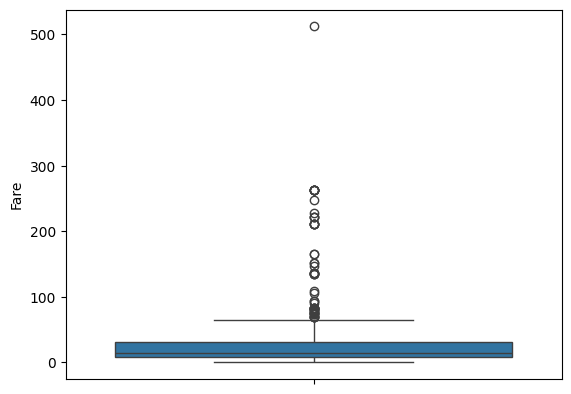

In [ ]:
sns.boxplot(df_test['Fare'])

In [ ]:
df_test.isna().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327
Embarked,0


In [ ]:
df_test['Fare'].median()

14.4542

In [ ]:
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

In [ ]:
df_test['Age'].mean()

np.float64(30.272590361445783)

In [ ]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [ ]:
df_test['Cabin'].mode()[0]

'B57 B59 B63 B66'

In [ ]:
df_test['Cabin'].fillna(df_test['Cabin'].mode()[0],inplace=True)

In [ ]:
df_test.isna().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0
Embarked,0


In [ ]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,3,female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,2,male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,3,male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,3,female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1,female,39.00000,0,0,PC 17758,108.9000,C105,C
415,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,3,male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


In [ ]:
df_test['Ticket'].value_counts()

,count
Ticket,
PC 17608,5
CA. 2343,4
113503,4
347077,3
SOTON/O.Q. 3101315,3
...,...
330972,1
7538,1
3101298,1


In [ ]:
df_test['Ticket']=encoder.fit_transform(df_test['Ticket'])

In [ ]:
df_test['Cabin']=encoder.fit_transform(df_test['Cabin'])

In [ ]:
df_test['Embarked']=encoder.fit_transform(df_test['Embarked'])

In [ ]:
df_test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df_test['Sex']=encoder.fit_transform(df_test['Sex'])

In [ ]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,34.50000,0,0,152,7.8292,15,1
1,3,0,47.00000,1,0,221,7.0000,15,2
2,2,1,62.00000,0,0,73,9.6875,15,1
3,3,1,27.00000,0,0,147,8.6625,15,2
4,3,0,22.00000,1,1,138,12.2875,15,2
...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,267,8.0500,15,2
414,1,0,39.00000,0,0,324,108.9000,22,0
415,3,1,38.50000,0,0,346,7.2500,15,2
416,3,1,30.27259,0,0,220,8.0500,15,2


In [ ]:
X_train = df_train.drop('Survived', axis=1)  # target column name
y_train = df_train['Survived']

X_test = df_test.copy()

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,523,7.2500,47,2
1,1,0,38.000000,1,0,596,71.2833,81,0
2,3,0,26.000000,0,0,669,7.9250,47,2
3,1,0,35.000000,1,0,49,53.1000,55,2
4,3,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,101,13.0000,47,2
887,1,0,19.000000,0,0,14,30.0000,30,2
888,3,0,29.699118,1,2,675,23.4500,47,2
889,1,1,26.000000,0,0,8,30.0000,60,0


In [ ]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,34.50000,0,0,152,7.8292,15,1
1,3,0,47.00000,1,0,221,7.0000,15,2
2,2,1,62.00000,0,0,73,9.6875,15,1
3,3,1,27.00000,0,0,147,8.6625,15,2
4,3,0,22.00000,1,1,138,12.2875,15,2
...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,267,8.0500,15,2
414,1,0,39.00000,0,0,324,108.9000,22,0
415,3,1,38.50000,0,0,346,7.2500,15,2
416,3,1,30.27259,0,0,220,8.0500,15,2


In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Split into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model1= LogisticRegression(max_iter=1000, random_state=42)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred1 = model1.predict(X_val)

In [ ]:
y_pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [ ]:
y_prob = model.predict_proba(X_val)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
print("Accuracy :", accuracy_score(y_val, y_pred1))

Accuracy : 0.7988826815642458


In [ ]:
print("Precision:", precision_score(y_val, y_pred1))

Precision: 0.7894736842105263


In [ ]:
print("Recall   :", recall_score(y_val, y_pred1))

Recall   : 0.6521739130434783


In [ ]:
print("F1-score :", f1_score(y_val, y_pred1))

F1-score : 0.7142857142857143


In [ ]:
print("ROC-AUC  :", roc_auc_score(y_val, y_prob))

ROC-AUC  : 0.8372859025032938


In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
auc_score = roc_auc_score(y_val, y_prob)

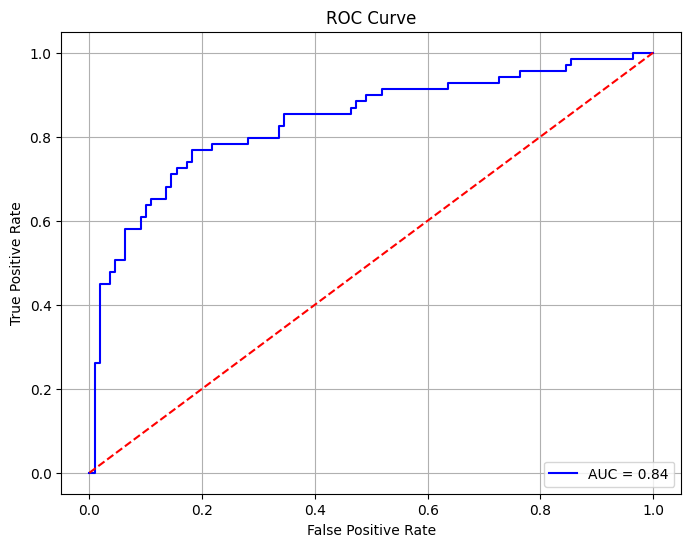

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
X_columns = X_train.columns

# Coefficients from the trained model
coefficients = model.coef_[0]

# Combine into a DataFrame for better readability
coef_df = pd.DataFrame({
    'Feature': X_columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

    Feature  Coefficient
7     Cabin     0.011629
6      Fare     0.003956
5    Ticket    -0.001175
2       Age    -0.036854
4     Parch    -0.111551
3     SibSp    -0.252359
8  Embarked    -0.288782
0    Pclass    -0.819514
1       Sex    -2.575044


Interpretation

Sign of coefficient:

Positive coefficient → increases the log-odds of survival (higher chance of survival).
for example cabin and Fare

Negative coefficient → decreases the log-odds of survival (lower chance of survival).
 for Example...

Ticket
Age
Parch  
SibSp
Embarked
Pclass
Sex

Magnitude of coefficient:

Larger absolute values → stronger effect on the target.

Small values → weaker effect.

# **1. What is the difference between precision and recall?**

Precision → focuses on correctness of positive predictions.

Recall → focuses on coverage of actual positives.

# **2. What is cross-validation, and why is it important in binary classification?**

Cross-validation is a technique to evaluate a model’s performance more reliably by splitting the dataset multiple times rather than using a single train-test split.
It helps in model selection and hyperparameter tuning and Reduces overfitting risk.

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))